# CAPM 예제
- 유가증권의 베타를 찾는 데 관심이 있다고 가정
- 회사의 주식 수익률를 시장의 수익률 및 절편과 함께 찾기

In [1]:
import pandas as pd 

time_steps = [1, 2, 3, 4, 5]
stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]

pd.DataFrame({
    "시간주기" : time_steps, 
    "주식수익률" : stock_returns, 
    "시장수익률" : mkt_returns
})

,시간주기,주식수익률,시장수익률
0,1,0.0650,0.055
1,2,0.0265,-0.090
2,3,-0.0593,-0.041
3,4,-0.0010,0.045
4,5,0.0346,0.022


In [2]:
from scipy import stats

stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]

beta, alpha, r_value, p_value, std_err = \
    stats.linregress(stock_returns, mkt_returns)

print(beta, alpha)

0.5077431878770808 -0.008481900352462384


- SML

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# 수익률 데이터
stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]

# 선형 회귀 분석 (베타 및 알파 계산)
beta, alpha, r_value, p_value, std_err = stats.linregress(stock_returns, mkt_returns)
print(beta, alpha, r_value, p_value, std_err)

# CAPM 변수 설정
rf = 0.05  # 무위험 수익률 (5%)
market_premium = 0.085  # 시장 위험 프리미엄 (8.5%)
beta = 0.5077  # 주식의 베타 값

# CAPM 공식: 기대 수익률 계산
expected_return = rf + beta * market_premium

# 결과 출력
print(f"무위험 수익률 (R_f): {rf:.2%}")
print(f"시장 위험 프리미엄 (E(R_M) - R_f): {market_premium:.2%}")
print(f"주식의 베타 (β): {beta}")
print(f"예상 자본 수익률 (E(R_i)): {expected_return:.2%}")

0.5077431878770808 -0.008481900352462384 0.38455905003823676 0.5227155239089462 0.7036705543221569
무위험 수익률 (R_f): 5.00%
시장 위험 프리미엄 (E(R_M) - R_f): 8.50%
주식의 베타 (β): 0.5077
예상 자본 수익률 (E(R_i)): 9.32%


회귀 분석 결과: Beta = 0.5077, Alpha = -0.0085


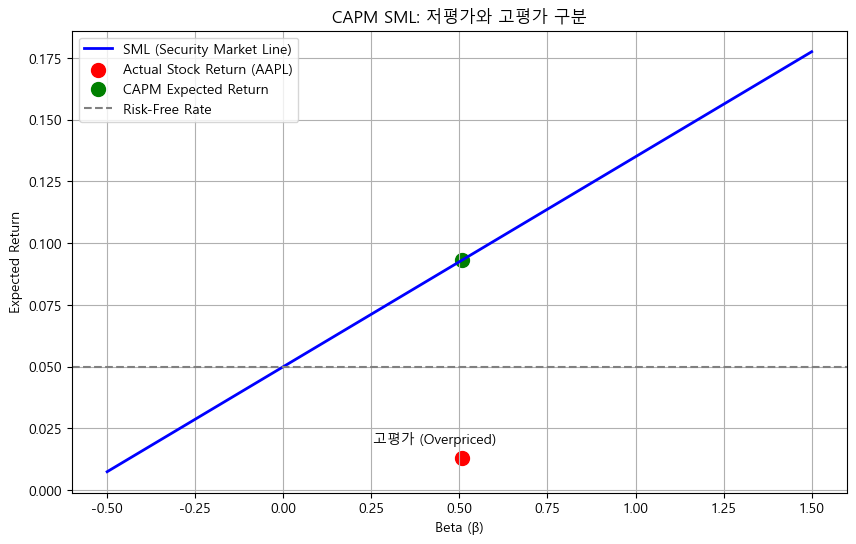


주식의 실제 평균 수익률: 1.32%
CAPM 기대 수익률: 9.32%
주식 상태: 고평가 (Overpriced)


In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import platform

# 시스템별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
elif platform.system() == 'Darwin':  # Darwin은 MacOS를 의미
    plt.rcParams['font.family'] = 'AppleGothic'   # 맥: 애플 고딕
else:
    plt.rcParams['font.family'] = 'NanumGothic'   # 리눅스 환경 (예: 나눔 고딕)

# 음수 값에 '-' 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 수익률 데이터
stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]

# 선형 회귀 분석 (베타 및 알파 계산)
beta, alpha, r_value, p_value, std_err = stats.linregress(stock_returns, mkt_returns)
print(f"회귀 분석 결과: Beta = {beta:.4f}, Alpha = {alpha:.4f}")

# CAPM 변수 설정
rf = 0.05  # 무위험 수익률 (5%)
market_premium = 0.085  # 시장 위험 프리미엄 (8.5%)
expected_return = rf + beta * market_premium

# SML (Security Market Line) 계산
betas = np.linspace(-0.5, 1.5, 100)  # 베타 값 범위 (-0.5 ~ 1.5)
sml_returns = rf + market_premium * betas  # SML 직선

# 주식의 실제 수익률 및 기대 수익률
actual_return = np.mean(stock_returns)
expected_stock_return = rf + beta * market_premium

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(betas, sml_returns, color='blue', linewidth=2, label="SML (Security Market Line)")
plt.scatter(beta, actual_return, color='red', s=100, label="Actual Stock Return (AAPL)")
plt.scatter(beta, expected_stock_return, color='green', s=100, label="CAPM Expected Return")
plt.axhline(y=rf, color='gray', linestyle='--', label="Risk-Free Rate")

# 저평가 또는 고평가 판단
if actual_return > expected_stock_return:
    status = "저평가 (Underpriced)"
else:
    status = "고평가 (Overpriced)"
plt.annotate(f"{status}", (beta, actual_return), textcoords="offset points", xytext=(-20,10), ha='center')

# 그래프 레이아웃 설정
plt.title("CAPM SML: 저평가와 고평가 구분")
plt.xlabel("Beta (β)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.show()

# 결과 출력
print(f"\n주식의 실제 평균 수익률: {actual_return:.2%}")
print(f"CAPM 기대 수익률: {expected_stock_return:.2%}")
print(f"주식 상태: {status}")

# 차익거래가격결정이론 모델

In [5]:
import numpy as np
import statsmodels.api as sm

# Generate some sample data
num_periods = 9
all_values = np.array([np.random.random(8) \
                       for i in range(num_periods)])

# Filter the data
y_values = all_values[:, 0] # First column values as Y
x_values = all_values[:, 1:] # All other values as X
x_values = sm.add_constant(x_values) # Include the intercept
results = sm.OLS(y_values, x_values).fit() # Regress and fit the model

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                 -0.692
Method:                 Least Squares   F-statistic:                    0.5326
Date:                Wed, 22 Jan 2025   Prob (F-statistic):              0.787
Time:                        11:15:07   Log-Likelihood:                 8.4783
No. Observations:                   9   AIC:                           -0.9566
Df Residuals:                       1   BIC:                            0.6212
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3791      2.388     -0.159      0.9

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
print(results.params)

[-0.37906882  1.36086344 -0.71034141 -0.55860382 -0.82164589  2.13747538
  1.30642376 -0.95908934]


# 선형 최적화
- 라이브러리 : https://github.com/pulp-platform/pulp
- 2개 변수를 가진 단순 선형 최적화 문제 

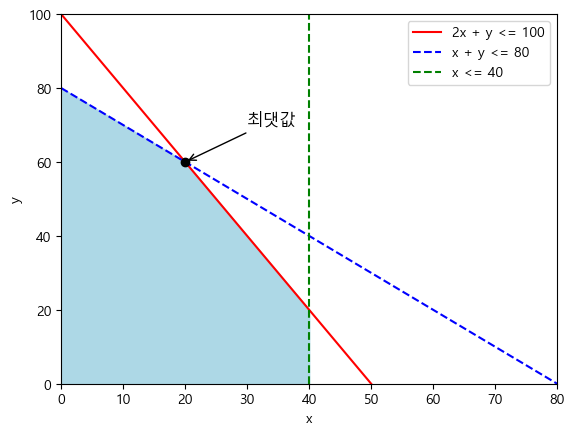

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import platform

# 시스템별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
elif platform.system() == 'Darwin':  # Darwin은 MacOS를 의미
    plt.rcParams['font.family'] = 'AppleGothic'   # 맥: 애플 고딕
else:
    plt.rcParams['font.family'] = 'NanumGothic'   # 리눅스 환경 (예: 나눔 고딕)

# Create the figure and axis
fig, ax = plt.subplots()

# Create the plot range
x = np.linspace(0, 80, 100)

# Equations of the constraints
y1 = 100 - 2*x  # 2x + y = 100
y2 = 80 - x     # x + y = 80 -> passes through (20, 60)
x3 = 40         # x = 40 (vertical line)

# Feasible region
x_fill = np.linspace(0, 40, 100)
y_fill = np.minimum(100 - 2*x_fill, 80 - x_fill)

# Plot the constraints
ax.plot(x, y1, 'r-', label='2x + y <= 100')   # Red solid line
ax.plot(x, y2, 'b--', label='x + y <= 80')   # Blue dashed line (updated constraint)
ax.axvline(x=x3, color='g', linestyle='--', label='x <= 40')  # Green dashed vertical line

# Fill the feasible region
ax.fill_between(x_fill, 0, y_fill, color='lightblue')

# Highlight the optimal solution
optimal_x, optimal_y = 20, 60  # Coordinates of the optimal point
ax.plot(optimal_x, optimal_y, 'ko')  # Black dot
ax.annotate('최댓값', xy=(optimal_x, optimal_y), xytext=(30, 70),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Set axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# Set limits
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)

# Add legend
ax.legend()

# Show the plot
plt.show()

In [8]:
import pulp

x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)

problem = pulp.LpProblem(
    'A simple maximization objective', 
    pulp.LpMaximize)
problem += 3*x + 2*y, 'The objective function'
problem += 2*x + y <= 100, '1st constraint'
problem += x + y <= 80, '2nd constraint'
problem += x <= 40, '3rd constraint'
problem.solve()

ModuleNotFoundError: No module named 'pulp'

In [16]:
print("Maximization Results:")
for variable in problem.variables():
    print(variable.name, '=', variable.varValue)

y = 3 * 20 + 2 * 60
print(y)

Maximization Results:
x = 20.0
y = 60.0
180


# 정수 프로그래밍 사용 예제
- 딜러 Y로부터 90건의 계약 구매
- 딜러 Z로부터 60건의 계약 구매
- 다른 모든 제약 충족하면서 66,500$ 최저 비용 값 얻을 수 있음

In [26]:
import pulp

# 딜러 목록
dealers = ['X', 'Y', 'Z']

# 변수 비용 (단위당 비용)
variable_costs = {'X': 500, 'Y': 350, 'Z': 450}

# 고정 비용 (딜러별로 발생하는 고정 비용)
fixed_costs = {'X': 4000, 'Y': 2000, 'Z': 6000}

# PuLP 변수를 정의 (딜러별로 계약 수량과 이진 변수)
quantities = pulp.LpVariable.dicts('quantity',  # 계약 수량 변수
                                   dealers, 
                                   lowBound=0,  # 최소값은 0
                                   cat=pulp.LpInteger)  # 정수형 변수
is_orders = pulp.LpVariable.dicts('orders',  # 계약 여부를 나타내는 이진 변수
                                  dealers,
                                  cat=pulp.LpBinary)  # 이진 변수: 0 또는 1

# 모델 초기화 및 목적 함수 설정
model = pulp.LpProblem('A cost minimization problem', pulp.LpMinimize)

# 목표 함수: 비용 최소화 (단위 비용 * 수량 + 고정 비용 * 계약 여부)
model += sum([variable_costs[i] * quantities[i] + 
              fixed_costs[i] * is_orders[i] for i in dealers]), 'Minimize portfolio cost'

# 제약 조건 1: 총 계약 수는 150개여야 한다.
model += sum([quantities[i] for i in dealers]) == 150, 'Total contracts required'

# 제약 조건 2: 각 딜러별 최소 및 최대 계약 수량 설정
model += is_orders['X'] * 30 <= quantities['X'] <= is_orders['X'] * 100, 'Boundary of total volume of X'
model += is_orders['Y'] * 30 <= quantities['Y'] <= is_orders['Y'] * 90, 'Boundary of total volume of Y'
model += is_orders['Z'] * 30 <= quantities['Z'] <= is_orders['Z'] * 70, 'Boundary of total volume of Z'

# 문제 해결
model.solve()

# 결과 출력
print('Minimization Results:')
for variable in model.variables():
    print(variable, '=', variable.varValue)

# 총 비용 출력
print('Total cost:', pulp.value(model.objective))

Minimization Results:
orders_X = 0.0
orders_Y = 1.0
orders_Z = 1.0
quantity_X = 0.0
quantity_Y = 90.0
quantity_Z = 60.0
Total cost: 66500.0


# 행렬을 사용한 선형 방정식
- a 증권은 6개 단위의 롱 포지션
- b 증권은 15개 단위의 롱 포지션
- c 증권은 23개 단위의 숏 포지션으로 구성

In [28]:
"""
- a 증권은 6개 단위의 롱 포지션
- b 증권은 15개 단위의 롱 포지션
- c 증권은 23개 단위의 숏 포지션으로 구성
"""

import numpy as np

A = np.array([[2, 1, 1],[1, 3, 2],[1, 0, 0]])
B = np.array([4, 5, 6])

print(np.linalg.solve(A, B))

[  6.  15. -23.]


# LU 분해

In [30]:
 """ 
LU decomposition with SciPy 
"""
import numpy as np
import scipy.linalg as linalg


# Define A and B
A = np.array([
    [2., 1., 1.],
    [1., 3., 2.],
    [1., 0., 0.]])
B = np.array([4., 5., 6.])

# Perform LU decompositiopn
LU = linalg.lu_factor(A)
x = linalg.lu_solve(LU, B)
print(x)

[  6.  15. -23.]


In [31]:
import scipy

P, L, U = scipy.linalg.lu(A)

print('P=\n', P)
print('L=\n', L)
print('U=\n', U)

P=
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L=
 [[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [ 0.5 -0.2  1. ]]
U=
 [[ 2.   1.   1. ]
 [ 0.   2.5  1.5]
 [ 0.   0.  -0.2]]


# 촐레스키 분해

In [34]:
""" 
Cholesky decomposition with NumPy 
"""
import numpy as np

A = np.array([
    [10., -1., 2., 0.],
    [-1., 11., -1., 3.],
    [2., -1., 10., -1.],
    [0., 3., -1., 8.]])
B = np.array([6., 25., -11., 15.])

L = np.linalg.cholesky(A)
print(L)

[[ 3.16227766  0.          0.          0.        ]
 [-0.31622777  3.3015148   0.          0.        ]
 [ 0.63245553 -0.24231301  3.08889696  0.        ]
 [ 0.          0.9086738  -0.25245792  2.6665665 ]]


In [37]:
print(np.dot(L, L.T.conj()))  # A=L.L*
y = np.linalg.solve(L, B)  # L.L*.x=B; When L*.x=y, then L.y=B
x = np.linalg.solve(L.T.conj(), y)  # x=L*'.y
print(x)
print(np.mat(A) * np.mat(x).T)  # B=Ax

[[10. -1.  2.  0.]
 [-1. 11. -1.  3.]
 [ 2. -1. 10. -1.]
 [ 0.  3. -1.  8.]]
[ 1.  2. -1.  1.]
[[  6.]
 [ 25.]
 [-11.]
 [ 15.]]


# QR 분해

In [38]:
""" 
QR decomposition with scipy 
"""
import numpy as np
import scipy.linalg as linalg


A = np.array([
    [2., 1., 1.],
    [1., 3., 2.],
    [1., 0., 0]])
B = np.array([4., 5., 6.])

Q, R = scipy.linalg.qr(A)  # QR decomposition
y = np.dot(Q.T, B)  # Let y=Q'.B
x = scipy.linalg.solve(R, y)  # Solve Rx=y

print(x)

[  6.  15. -23.]


# 자코비 기법
- 25번의 반복을 사용하여 X의 값을 찾음

In [1]:
"""
Solve Ax=B with the Jacobi method 
"""
import numpy as np

def jacobi(A, B, n, tol=1e-10):
    # Initializes x with zeroes with same shape and type as B
    x = np.zeros_like(B)

    for iter_count in range(n):
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (B[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_new, tol):
            break

        x = x_new

    return x

A = np.array([
    [10., -1., 2., 0.], 
    [-1., 11., -1., 3.], 
    [2., -1., 10., -1.], 
    [0.0, 3., -1., 8.]])
B = np.array([6., 25., -11., 15.])
n = 25

x = jacobi(A, B, n)
print('x', '=', x)

x = [ 1.  2. -1.  1.]


# 가우스-자이델

In [3]:
""" 
Solve Ax=B with the Gauss-Seidel method 
"""
import numpy as np


def gauss(A, B, n, tol=1e-10):
    L = np.tril(A)  # returns the lower triangular matrix of A
    U = A-L  # decompose A = L + U
    L_inv = np.linalg.inv(L)
    x = np.zeros_like(B)

    for i in range(n):
        Ux = np.dot(U, x)
        x_new = np.dot(L_inv, B - Ux)

        if np.allclose(x, x_new, tol):
            break

        x = x_new

    return x

A = np.array([
    [10., -1., 2., 0.], 
    [-1., 11., -1., 3.], 
    [2., -1., 10., -1.], 
    [0.0, 3., -1., 8.]])
B = np.array([6., 25., -11., 15.])
n = 100
x = gauss(A, B, n)
print('x', '=', x)

x = [ 1.  2. -1.  1.]
